In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, precision_score, f1_score, recall_score, confusion_matrix, silhouette_score, davies_bouldin_score, calinski_harabasz_score
import time
from sklearn.preprocessing import LabelEncoder, MinMaxScaler,StandardScaler
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans

In [3]:
df = pd.read_csv('seeds.csv')

In [4]:
df

,Area,Perimeter,Compactness,Length of kernel,Width of kernel,Asymmetry coefficient,Length of kernel groove
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175
...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056
208,11.84,13.21,0.8521,NaN,2.836,3.598,5.044


In [5]:
df.isna().sum()


Area                       1
Perimeter                  1
Compactness                1
Length of kernel           1
Width of kernel            1
Asymmetry coefficient      1
Length of kernel groove    1
dtype: int64

In [6]:
df.dropna(inplace = True)

In [8]:
df[df.duplicated()]
# No duplciates

,Area,Perimeter,Compactness,Length of kernel,Width of kernel,Asymmetry coefficient,Length of kernel groove


In [10]:
df1 = df.select_dtypes(include = ['int','float'])

In [11]:
dicti = {}

for i in df1.columns:


    Q1 = df1[i].quantile(0.25)
    Q3 = df1[i].quantile(0.75)
    IQR = Q3 - Q1

    lower_limit = Q1 - (1.5*IQR)
    upper_limit = Q3 + (1.5*IQR)

    dicti[i] = df1[(df1[i] < lower_limit) | (df1[i] > upper_limit)].count()[0]

C:\Users\shreyas.sridharan.lv\AppData\Local\Temp\ipykernel_36672\2289933199.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  dicti[i] = df1[(df1[i] < lower_limit) | (df1[i] > upper_limit)].count()[0]
C:\Users\shreyas.sridharan.lv\AppData\Local\Temp\ipykernel_36672\2289933199.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  dicti[i] = df1[(df1[i] < lower_limit) | (df1[i] > upper_limit)].count()[0]
C:\Users\shreyas.sridharan.lv\AppData\Local\Temp\ipykernel_36672\2289933199.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated 

In [12]:
dicti
# We have 3 outliers in compactness and 2 in asymmetry coefficient but due to the low number of rows, we will replace with mean value 

{'Area': 0,
 'Perimeter': 0,
 'Compactness': 3,
 'Length of kernel': 0,
 'Width of kernel': 0,
 'Asymmetry coefficient': 2,
 'Length of kernel groove': 0}

In [13]:
Q1 = df['Compactness'].quantile(0.25)
Q3 = df['Compactness'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - (1.5*IQR)
upper_limit = Q3 + (1.5*IQR)

df[(df['Compactness'] < lower_limit) | (df['Compactness'] > upper_limit)] = df['Compactness'].mean()
# Replacing outliers with the mean

In [14]:
Q1 = df['Asymmetry coefficient'].quantile(0.25)
Q3 = df['Asymmetry coefficient'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - (1.5*IQR)
upper_limit = Q3 + (1.5*IQR)

df[(df['Asymmetry coefficient'] < lower_limit) | (df['Asymmetry coefficient'] > upper_limit)] = df['Asymmetry coefficient'].mean()
# Replacing outliers with the mean

In [18]:
df = df.round(2)

In [19]:
df.describe()

,Area,Perimeter,Compactness,Length of kernel,Width of kernel,Asymmetry coefficient,Length of kernel groove
count,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000
mean,14.578571,14.269113,0.899507,5.543744,3.233695,3.627291,5.330936
std,3.516985,2.356767,0.277955,0.748701,0.472961,1.465193,0.753184
min,0.870000,0.870000,0.810000,0.870000,0.870000,0.770000,0.870000
25%,12.200000,13.405000,0.860000,5.240000,2.940000,2.480000,5.040000
50%,14.330000,14.290000,0.870000,5.520000,3.240000,3.600000,5.220000
75%,17.290000,15.700000,0.890000,5.980000,3.565000,4.690000,5.880000
max,21.180000,17.250000,3.670000,6.680000,4.030000,7.520000,6.550000


<Axes: xlabel='Area', ylabel='Perimeter'>

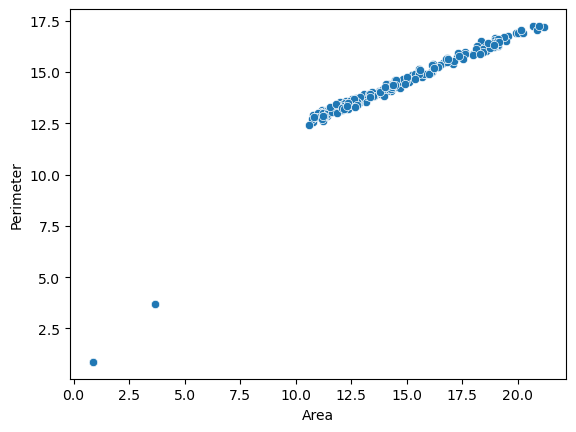

In [20]:
sns.scatterplot(data = df, x = 'Area', y = 'Perimeter')

<Axes: xlabel='Length of kernel', ylabel='Width of kernel'>

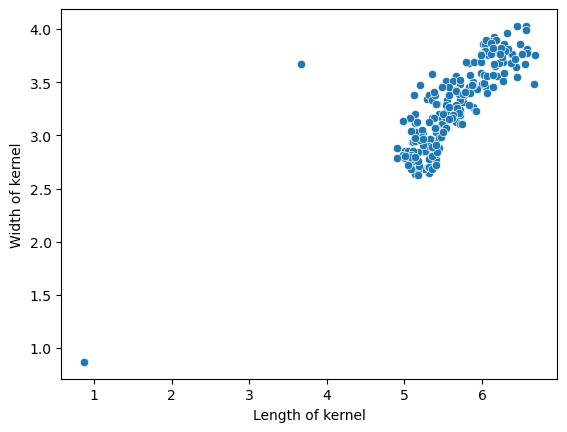

In [21]:
sns.scatterplot(data = df, x = 'Length of kernel', y = 'Width of kernel')

In [22]:
df.corr()

,Area,Perimeter,Compactness,Length of kernel,Width of kernel,Asymmetry coefficient,Length of kernel groove
Area,1.000000,0.927237,-0.269189,0.906579,0.891469,-0.062568,0.879251
Perimeter,0.927237,1.000000,-0.424486,0.968361,0.798425,0.053084,0.930373
Compactness,-0.269189,-0.424486,1.000000,-0.231814,0.139978,-0.025353,-0.207884
Length of kernel,0.906579,0.968361,-0.231814,1.000000,0.846358,0.090612,0.972437
Width of kernel,0.891469,0.798425,0.139978,0.846358,1.000000,-0.055206,0.808447
Asymmetry coefficient,-0.062568,0.053084,-0.025353,0.090612,-0.055206,1.000000,0.171304
Length of kernel groove,0.879251,0.930373,-0.207884,0.972437,0.808447,0.171304,1.000000


In [ ]:
# Asymmetry coefficient has very less correlation value with all other columns and for the sake of our clustering, lets remove the row

In [24]:
df.drop(columns = {'Asymmetry coefficient'}, inplace = True)

In [25]:
# We will also scale each feature since K means works better with scaled data (since its a distance based alogirthm)

In [26]:
scaler = StandardScaler()

In [27]:
df1 = scaler.fit_transform(df)

In [30]:
df1 = pd.DataFrame(df1, columns = df.columns)
df1

,Area,Perimeter,Compactness,Length of kernel,Width of kernel,Length of kernel groove
0,0.194233,0.242832,-0.106421,0.289556,0.161735,-0.147653
1,0.085918,0.127985,-0.070355,0.008377,0.204126,-0.493708
2,-0.082254,-0.076187,0.001777,-0.339750,0.225322,-0.680045
3,-0.210520,-0.139991,0.001777,-0.299582,0.310104,-0.706665
4,0.445065,0.306636,0.001777,0.155661,0.691627,-0.200893
...,...,...,...,...,...,...
198,-0.629525,-0.339910,-0.142487,-0.460255,-0.580114,-0.440469
199,-0.680832,-0.454757,-0.070355,-0.540592,-0.537723,-0.613496
200,-0.954468,-0.590872,-0.178553,-0.540592,-0.919245,-0.440469
201,-3.109350,-4.508430,9.992044,-2.508847,0.924779,-2.210672


In [34]:
# We will first use the elbow method to analyze the optimum number of clusters

krange = list(range(2,10))
inertia = []

for k in krange:
    k_model = KMeans(n_clusters=k, init="k-means++")
    k_model.fit(df1)
    inertia.append(k_model.inertia_)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

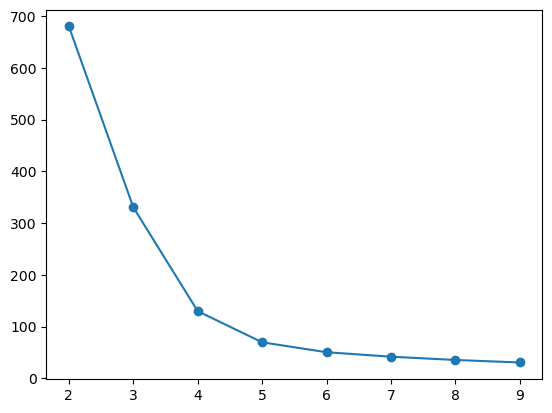

In [36]:
plt.plot(krange,inertia,marker = 'o')

In [37]:
# We will also use sillhoute score 
# We will first use the elbow method to analyze the optimum number of clusters

krange = list(range(2,10))
sillhoute_scores = []

for k in krange:
    k_model = KMeans(n_clusters=k, init="k-means++")
    score = silhouette_score(df1,k_model.fit_predict(df1))
    sillhoute_scores.append(score)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

In [38]:
sillhoute_scores

[0.8356397895435855,
 0.5775809278989613,
 0.6171618961886838,
 0.5275284554461371,
 0.47520338865451495,
 0.40355872493504147,
 0.3789045360230724,
 0.3692233751784029]

In [39]:
# We will take 3 clusters

In [40]:
k_model = KMeans(n_clusters=3, init = 'k-means++')
k_model.fit(df1)
labels = k_model.predict(df1)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [45]:
df['clusters'] = labels

In [47]:
df.head(1)

,Area,Perimeter,Compactness,Length of kernel,Width of kernel,Length of kernel groove,clusters
0,15.26,14.84,0.87,5.76,3.31,5.22,0


In [48]:
df.groupby(['clusters']).describe().transpose()
# Profiling of the seeds based on the clusters 

clusters                                0          1     2
Area                    count  127.000000  73.000000  3.00
                        mean    12.821811  18.198219  0.87
                        std      1.855334   1.456271  0.00
                        min      3.670000  15.380000  0.87
                        25%     11.555000  16.870000  0.87
                        50%     12.720000  18.550000  0.87
                        75%     14.135000  19.110000  0.87
                        max     15.990000  21.180000  0.87
Perimeter               count  127.000000  73.000000  3.00
                        mean    13.546772  16.076438  0.87
                        std      1.410248   0.624347  0.00
                        min      3.670000  14.890000  0.87
                        25%     13.130000  15.620000  0.87
                        50%     13.570000  16.190000  0.87
                        75%     14.235000  16.500000  0.87
                        max     14.940000  17.250000  0.87
Compactness             count  127.000000  73.000000  3.00
                        mean     0.909449   0.883425  0.87
                        std      0.351350   0.015831  0.00
                        min      0.810000   0.850000  0.87
                        25%      0.850000   0.870000  0.87
                        50%      0.870000   0.880000  0.87
                        75%      0.880000   0.900000  0.87
                        max      3.670000   0.910000  0.87
Length of kernel        count  127.000000  73.000000  3.00
                        mean     5.315039   6.133699  0.87
                        std      0.295562   0.253938  0.00
                        min      3.670000   5.660000  0.87
                        25%      5.165000   5.930000  0.87
                        50%      5.330000   6.110000  0.87
                        75%      5.490000   6.280000  0.87
                        max      5.760000   6.680000  0.87
Width of kernel         count  127.000000  73.000000  3.00
                        mean     3.043622   3.661507  0.87
                        std      0.251430   0.186724  0.00
                        min      2.630000   3.230000  0.87
                        25%      2.835000   3.500000  0.87
                        50%      3.030000   3.680000  0.87
                        75%      3.205000   3.790000  0.87
                        max      3.670000   4.030000  0.87
Length of kernel groove count  127.000000  73.000000  3.00
                        mean     5.061024   5.983836  0.87
                        std      0.267282   0.276886  0.00
                        min      3.670000   5.180000  0.87
                        25%      4.960000   5.840000  0.87
                        50%      5.090000   5.960000  0.87
                        75%      5.220000   6.180000  0.87
                        max      5.490000   6.550000  0.87

<Axes: xlabel='Area', ylabel='Perimeter'>

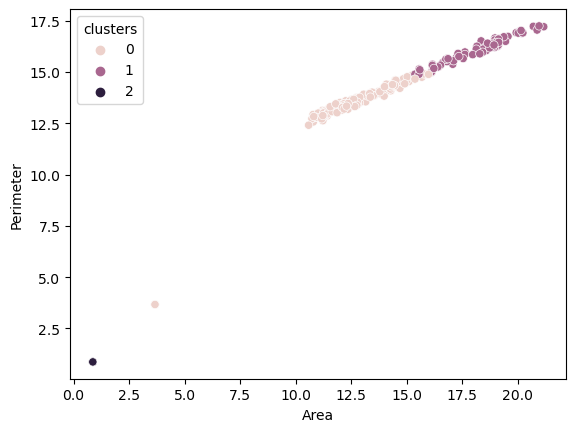

In [51]:
sns.scatterplot(data = df, x = 'Area', y = 'Perimeter', hue = 'clusters')

<Axes: xlabel='Length of kernel', ylabel='Width of kernel'>

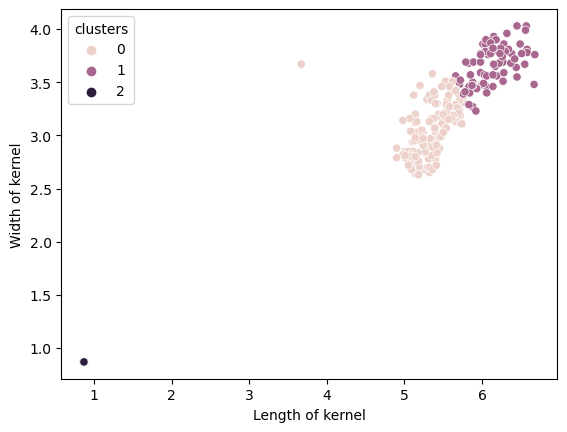

In [52]:
sns.scatterplot(data = df, x = 'Length of kernel', y = 'Width of kernel', hue = 'clusters')